# NLFT Examples

This notebook goes through all of the examples and demonstrates that even if our constraints are violated (by not oversampling or rescaling our target functions), the NLFT method with Weiss still results in an accurate function.

In [1]:
import numpy as np
from qsppack.utils import cvx_poly_coef
from qsppack.solver import solve
from qsppack.utils import chebyshev_to_func, get_entry
import matplotlib.pyplot as plt

## Linear Systems Problem

In [2]:
kappa = 10
targ = lambda x: 1/(kappa*x)
deg = 71
parity = deg % 2
opts = {
    'intervals': [1/kappa, 1],
    'objnorm': np.inf,
    'epsil': 0.01,
    'npts': 71,
    'fscale': 1,
    'isplot': False,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

# plt.plot(xlist, QSP_value - func_value)
# plt.xlabel('$x$', fontsize=12)
# plt.ylabel('$g(x,\\Phi^*)-f_\\mathrm{poly}(x)$', fontsize=12)
# plt.show()

norm error = 0.010000000005610632
max of solution = 0.9899999999943894


/var/folders/bz/68lg1ys109jbpl3rbpx1jjmw0000gn/T/ipykernel_50775/2400647397.py:2: RuntimeWarning: divide by zero encountered in divide
  targ = lambda x: 1/(kappa*x)


The residual error is
0.024624629226102424


/var/folders/bz/68lg1ys109jbpl3rbpx1jjmw0000gn/T/ipykernel_50775/2400647397.py:2: RuntimeWarning: divide by zero encountered in divide
  targ = lambda x: 1/(kappa*x)


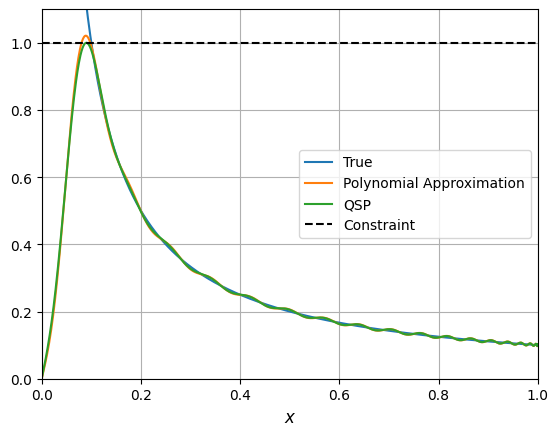

In [3]:
plt.plot(xlist, targ(xlist), label='True')
plt.plot(xlist, func_value, label='Polynomial Approximation')
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, np.ones(len(xlist)), "k--", label='Constraint')
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.ylim([0, 1.1])
plt.xlim([0, 1])
plt.show()

## Negative Power Functions

In [4]:
kappa = 10
targ = lambda x: 1/(x**2)
deg = 70
parity = deg % 2

opts = {
    'intervals': [1/kappa, 1],
    'objnorm': np.inf,
    'epsil': 0.01,
    'npts': 70,
    'fscale': 1/(kappa**2),
    'isplot': False,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

norm error = 0.019861397887987464
max of solution = 0.9899999992053649


/var/folders/bz/68lg1ys109jbpl3rbpx1jjmw0000gn/T/ipykernel_50775/2730026234.py:2: RuntimeWarning: divide by zero encountered in divide
  targ = lambda x: 1/(x**2)


The residual error is
0.08321406958829414


/var/folders/bz/68lg1ys109jbpl3rbpx1jjmw0000gn/T/ipykernel_50775/2730026234.py:2: RuntimeWarning: divide by zero encountered in divide
  targ = lambda x: 1/(x**2)


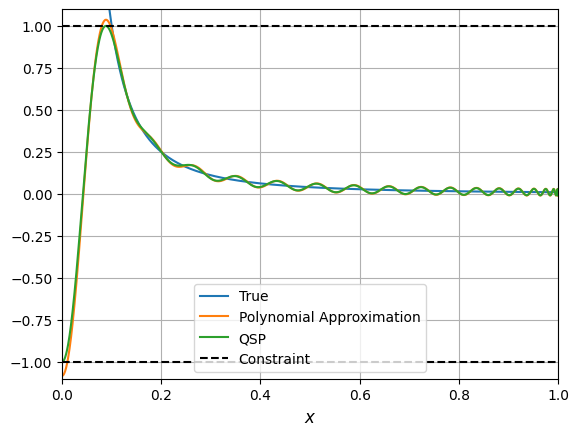

In [5]:
plt.plot(xlist, targ(xlist)*opts['fscale'], label='True')
plt.plot(xlist, func_value, label='Polynomial Approximation')
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, np.ones(len(xlist)), "k--", label='Constraint')
plt.plot(xlist, -np.ones(len(xlist)), "k--")
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.ylim([-1.1, 1.1])
plt.xlim([0, 1])
plt.show()

## Hamiltonian Simulation

In [6]:
tau = 10
targ = lambda x: np.cos(tau*x)
deg = 150
parity = deg % 2

opts = {
    'intervals': [0, 1],
    'objnorm': np.inf,
    'epsil': 0.01,
    'npts': 150,
    'fscale': 1,
    'isplot': False,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

norm error = 0.010000000013508314
max of solution = 0.9899999999864917
The residual error is
1.0608436351589035e-10


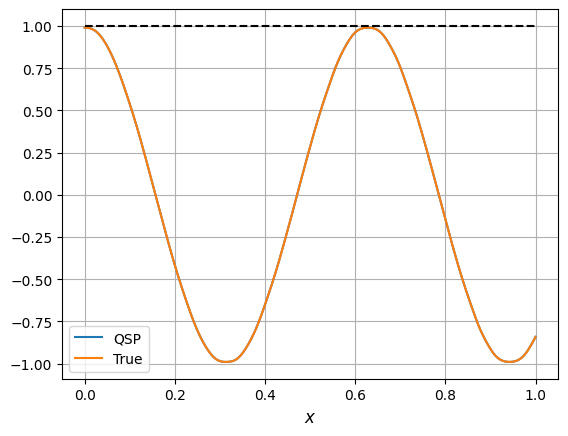

In [7]:
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, func_value, label='True')
plt.plot(xlist, np.ones(len(xlist)), "k--")
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.show()